In [1]:
import pandas as pd

# Load the uploaded CSV file
file_path = '/kaggle/input/llm-task/train_v2_drcat_02.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()


,text,label,prompt_name,source,RDizzl3_seven
0,Phones\n\nModern humans today are always on th...,0,Phones and driving,persuade_corpus,False
1,This essay will explain if drivers should or s...,0,Phones and driving,persuade_corpus,False
2,Driving while the use of cellular devices\n\nT...,0,Phones and driving,persuade_corpus,False
3,Phones & Driving\n\nDrivers should not be able...,0,Phones and driving,persuade_corpus,False
4,Cell Phone Operation While Driving\n\nThe abil...,0,Phones and driving,persuade_corpus,False


In [2]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import numpy as np

# Parameters
max_words = 10000  # consider the top 10,000 words in the dataset
max_len = 200      # cut reviews after 200 words

# Tokenization
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(data['text'])
sequences = tokenizer.texts_to_sequences(data['text'])

# Padding sequences
word_index = tokenizer.word_index
data_padded = pad_sequences(sequences, maxlen=max_len)

# Prepare labels
labels = np.asarray(data['label'])
labels = to_categorical(labels)  # One-hot encoding of labels

# Splitting data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(data_padded, labels, test_size=0.2, random_state=0)

In [3]:
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dense

# Model parameters
embedding_dim = 50

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=max_len))
model.add(Conv1D(32, 7, activation='relu'))
model.add(MaxPooling1D(5))
model.add(Conv1D(32, 7, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(len(labels[0]), activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])


2024-02-18 14:26:30.349633: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2024-02-18 14:26:30.349738: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2024-02-18 14:26:30.349836: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2024-02-18 14:26:30.349915: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2024-02-18 14:26:30.349995: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2024-02-18 14:26:30.350185: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2024-02-18 14:26:30.350286: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority un

In [4]:
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val, y_val))

Epoch 1/10
1122/1122 [==============================] - 9s 8ms/step - loss: 0.1088 - acc: 0.9537 - val_loss: 0.0707 - val_acc: 0.9756
Epoch 2/10
1122/1122 [==============================] - 8s 7ms/step - loss: 0.0362 - acc: 0.9887 - val_loss: 0.0467 - val_acc: 0.9851
Epoch 3/10
1122/1122 [==============================] - 8s 7ms/step - loss: 0.0276 - acc: 0.9923 - val_loss: 0.0561 - val_acc: 0.9816
Epoch 4/10
1122/1122 [==============================] - 8s 7ms/step - loss: 0.0209 - acc: 0.9942 - val_loss: 0.0510 - val_acc: 0.9867
Epoch 5/10
1122/1122 [==============================] - 8s 7ms/step - loss: 0.0152 - acc: 0.9958 - val_loss: 0.0534 - val_acc: 0.9865
Epoch 6/10
1122/1122 [==============================] - 8s 7ms/step - loss: 0.0115 - acc: 0.9970 - val_loss: 0.0582 - val_acc: 0.9860
Epoch 7/10
1122/1122 [==============================] - 8s 7ms/step - loss: 0.0079 - acc: 0.9981 - val_loss: 0.1165 - val_acc: 0.9741
Epoch 8/10
1122/1122 [==============================] - 8s 7ms

In [5]:
loss, accuracy = model.evaluate(x_val, y_val)
print("Validation Accuracy: {:.2f}%".format(accuracy * 100))

281/281 [==============================] - 1s 3ms/step - loss: 0.0812 - acc: 0.9836
Validation Accuracy: 98.36%


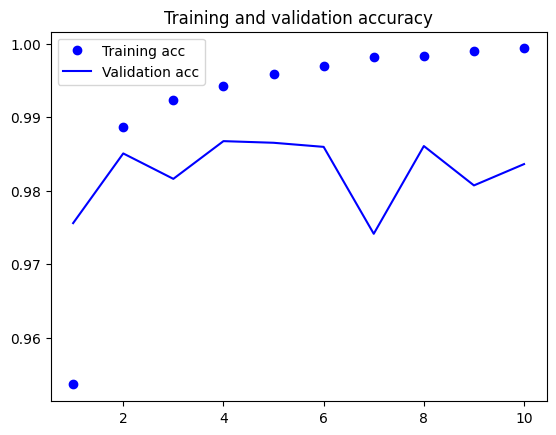

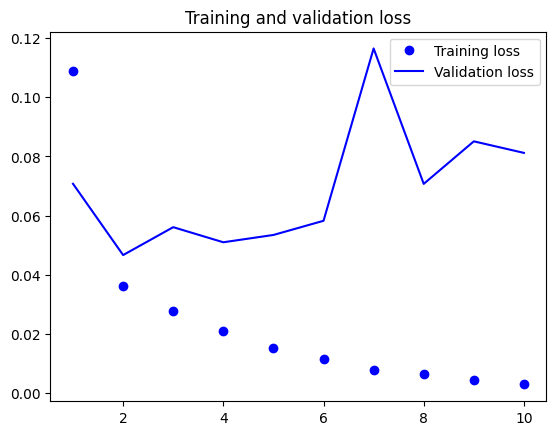

In [6]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


In [7]:
predictions = model.predict(x_val)
# Use argmax to convert predictions to label index
predicted_labels = predictions.argmax(axis=1)


281/281 [==============================] - 1s 3ms/step


In [8]:
!pip install nltk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 18.6 MB/s eta 0:00:0000:010:01

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [9]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

def clean_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = text.split()
    text = [word for word in text if word not in stopwords.words('english')]
    text = [WordNetLemmatizer().lemmatize(word) for word in text]
    return ' '.join(text)

data['text'] = data['text'].apply(clean_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [10]:
from keras.layers import Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dense, Dropout

# Model parameters
embedding_dim = 100 

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=max_len))
model.add(Dropout(0.2))
model.add(Conv1D(64, 5, activation='relu'))
model.add(MaxPooling1D(5))
model.add(Conv1D(64, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(len(labels[0]), activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])


In [11]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

callbacks = [
    EarlyStopping(monitor='val_loss', patience=2),
    ModelCheckpoint(filepath='model.h5', monitor='val_loss', save_best_only=True)
]

history = model.fit(x_train, y_train, epochs=20, batch_size=64, validation_data=(x_val, y_val), callbacks=callbacks)


Epoch 1/20
561/561 [==============================] - 10s 17ms/step - loss: 0.1264 - accuracy: 0.9455 - val_loss: 0.0517 - val_accuracy: 0.9830
Epoch 2/20
  9/561 [..............................] - ETA: 8s - loss: 0.0343 - accuracy: 0.9896

/usr/local/lib/python3.10/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


561/561 [==============================] - 10s 17ms/step - loss: 0.0398 - accuracy: 0.9875 - val_loss: 0.0638 - val_accuracy: 0.9806
Epoch 3/20
561/561 [==============================] - 10s 18ms/step - loss: 0.0287 - accuracy: 0.9915 - val_loss: 0.0679 - val_accuracy: 0.9788


In [12]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Predictions
y_pred = model.predict(x_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_val, axis=1)

# Confusion Matrix
print(confusion_matrix(y_true, y_pred_classes))

# Classification Report
print(classification_report(y_true, y_pred_classes))


281/281 [==============================] - 1s 3ms/step
[[5328  151]
 [  39 3456]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      5479
           1       0.96      0.99      0.97      3495

    accuracy                           0.98      8974
   macro avg       0.98      0.98      0.98      8974
weighted avg       0.98      0.98      0.98      8974



In [13]:
!pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 6.2 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


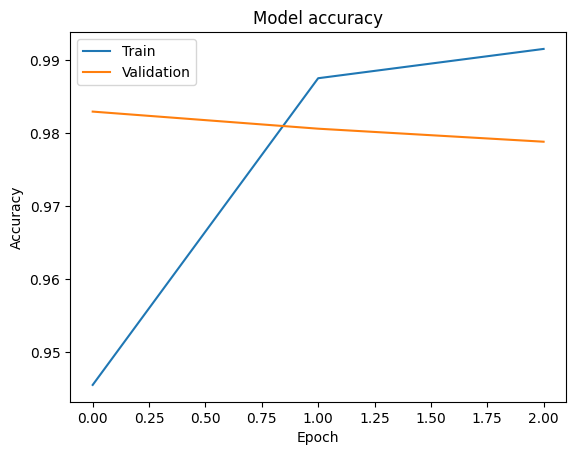

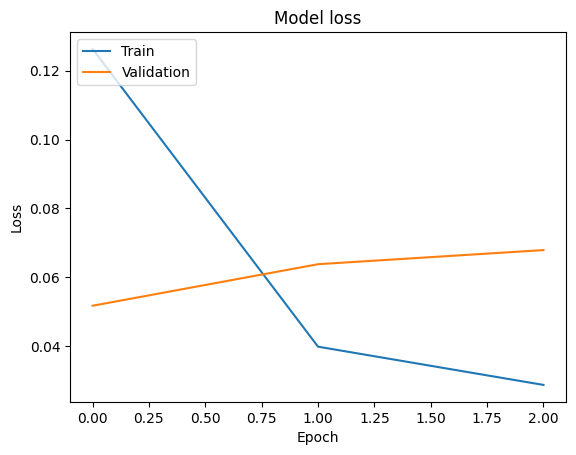

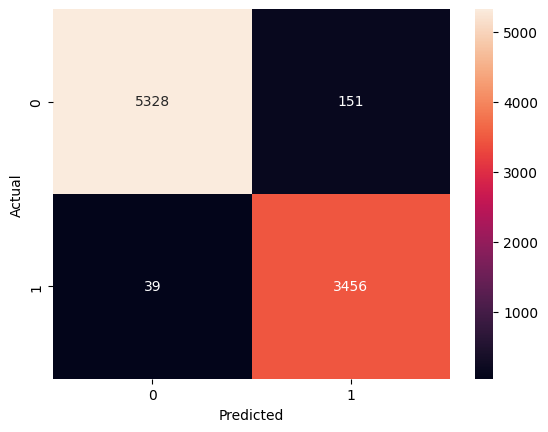

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting training & validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plotting training & validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Confusion Matrix Visualization
cm = confusion_matrix(y_true, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


In [15]:
model.save('text_classification_model.h5')  # Saves the model

/usr/local/lib/python3.10/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [16]:
# !pip install flask

In [17]:
# from flask import Flask, request, jsonify
# from keras.models import load_model
# from keras.preprocessing.sequence import pad_sequences

# app = Flask(__name__)
# model = load_model('/kaggle/working/text_classification_model.h5')

# @app.route('/predict', methods=['POST'])
# def predict():
#     data = request.get_json(force=True)
#     prediction = model.predict(pad_sequences(tokenizer.texts_to_sequences([data['text']]), maxlen=max_len))
#     return jsonify(prediction.tolist())

# if __name__ == '__main__':
#     app.run(port=5000, debug=True)

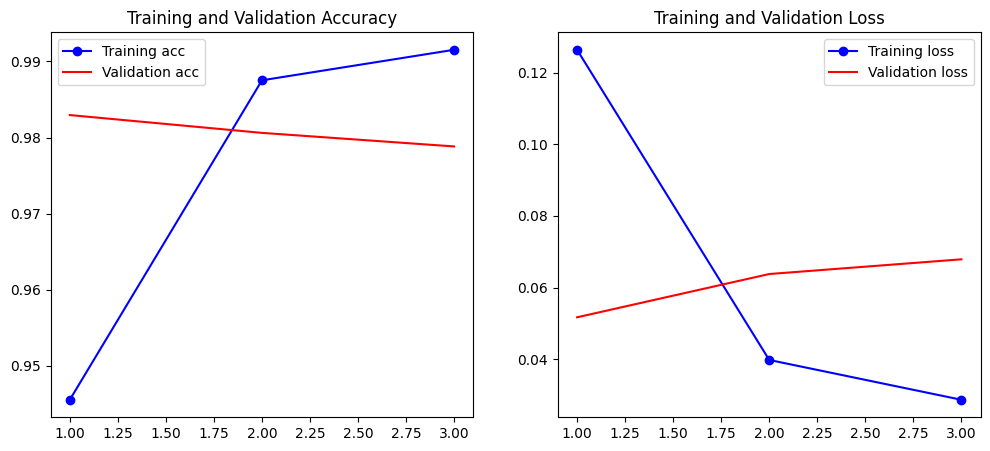

In [18]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

# Plot training & validation accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo-', label='Training acc')
plt.plot(epochs, val_acc, 'r-', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo-', label='Training loss')
plt.plot(epochs, val_loss, 'r-', label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()


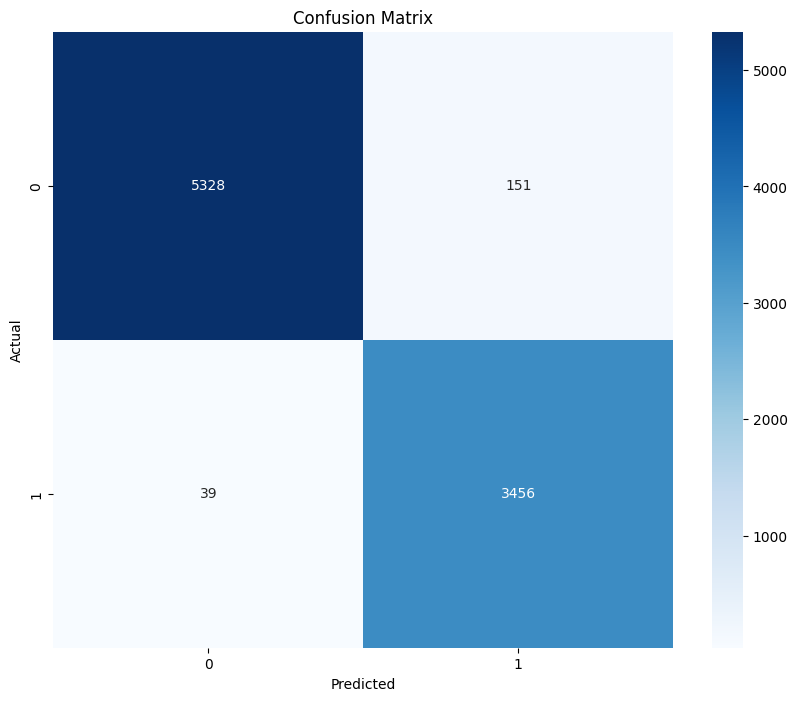

In [19]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_pred_classes and y_true as defined previously
cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


In [20]:
embeddings = model.layers[0].get_weights()[0]

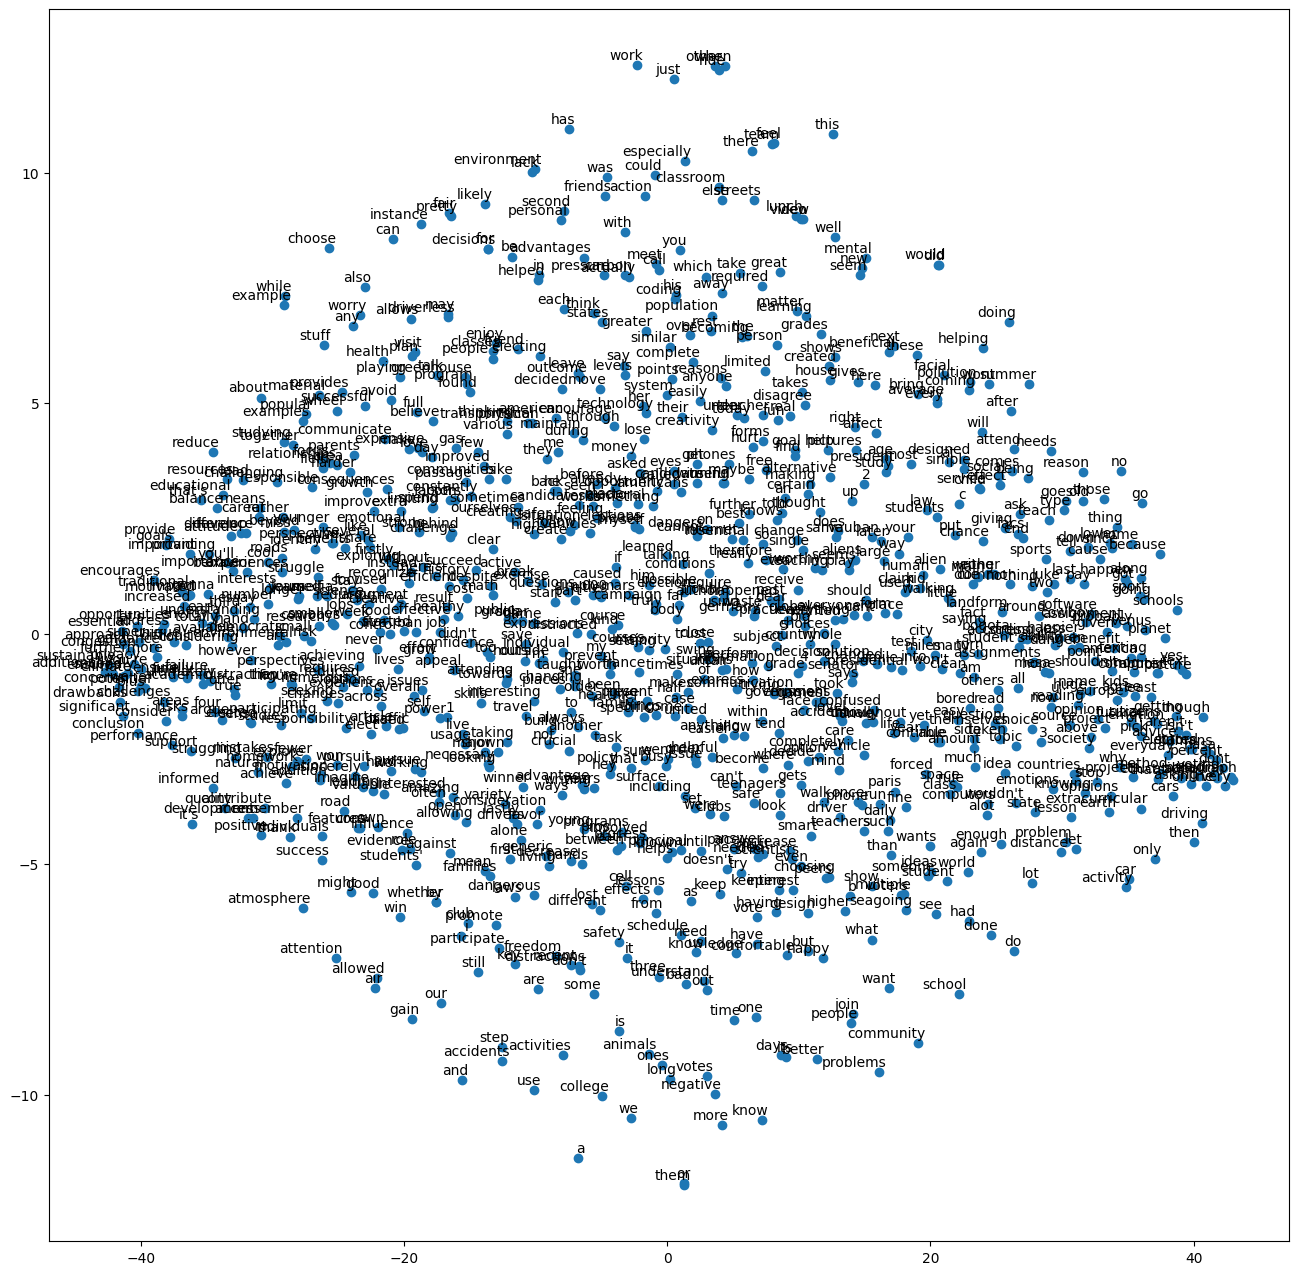

In [21]:
from sklearn.manifold import TSNE
import pandas as pd

# Assuming 'embeddings' and 'word_index' are already defined
tsne = TSNE(n_components=2, random_state=0)
words = list(word_index.keys())
vectors = []

# Adjust the number of words to visualize and ensure indices are in range
for word in words[:1000]:
    index = word_index[word]
    if index < max_words:
        vectors.append(embeddings[index])

Y = tsne.fit_transform(np.array(vectors))

# Creating a DataFrame for visualization
df = pd.DataFrame({'x': Y[:, 0], 'y': Y[:, 1], 'word': words[:len(vectors)]})

# Plot
plt.figure(figsize=(16, 16))
plt.scatter(df['x'], df['y'])
for i, word in enumerate(df['word']):
    plt.annotate(word, xy=(df['x'][i], df['y'][i]), xytext=(5, 2), 
                 textcoords='offset points', ha='right', va='bottom')
plt.show()


# LSTM

In [22]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import numpy as np

# Parameters
max_words = 10000  # number of words to consider in the dataset
max_len = 200      # max length of sequences

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(data['text'])
sequences = tokenizer.texts_to_sequences(data['text'])
data_padded = pad_sequences(sequences, maxlen=max_len)

labels = np.asarray(data['label'])
labels = to_categorical(labels)

# Split the data into a training set and a validation set
x_train, x_val, y_train, y_val = train_test_split(data_padded, labels, test_size=0.2, random_state=42)


In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

embedding_dim = 100  # or use 50, 200 based on your preference or pre-trained embeddings

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=max_len))
model.add(LSTM(128))
model.add(Dense(len(labels[0]), activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [24]:
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_val, y_val))

Epoch 1/10
281/281 [==============================] - 103s 360ms/step - loss: 0.1151 - accuracy: 0.9570 - val_loss: 0.0428 - val_accuracy: 0.9863
Epoch 2/10
281/281 [==============================] - 102s 362ms/step - loss: 0.0262 - accuracy: 0.9931 - val_loss: 0.0423 - val_accuracy: 0.9867
Epoch 3/10
281/281 [==============================] - 101s 360ms/step - loss: 0.0156 - accuracy: 0.9960 - val_loss: 0.0473 - val_accuracy: 0.9853
Epoch 4/10
281/281 [==============================] - 101s 359ms/step - loss: 0.0145 - accuracy: 0.9960 - val_loss: 0.0330 - val_accuracy: 0.9905
Epoch 5/10
281/281 [==============================] - 102s 363ms/step - loss: 0.0483 - accuracy: 0.9851 - val_loss: 0.0439 - val_accuracy: 0.9880
Epoch 6/10
281/281 [==============================] - 101s 360ms/step - loss: 0.0094 - accuracy: 0.9974 - val_loss: 0.0311 - val_accuracy: 0.9914
Epoch 7/10
281/281 [==============================] - 101s 360ms/step - loss: 0.0036 - accuracy: 0.9992 - val_loss: 0.0447 -

In [25]:
loss, accuracy = model.evaluate(x_val, y_val)
print(f'Validation Accuracy: {accuracy*100:.2f}%')

281/281 [==============================] - 18s 62ms/step - loss: 0.0367 - accuracy: 0.9924
Validation Accuracy: 99.24%


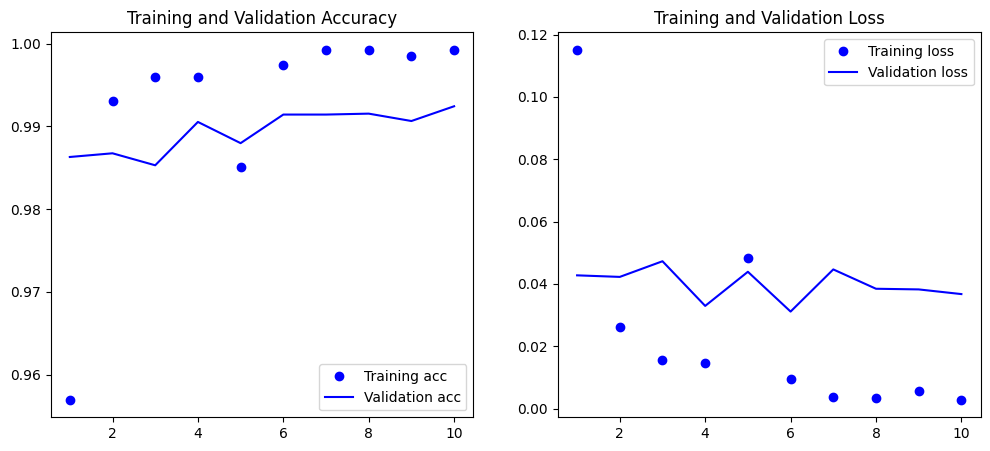

In [26]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()


In [27]:
predictions = model.predict(x_val)
predicted_classes = np.argmax(predictions, axis=1)
actual_classes = np.argmax(y_val, axis=1)

281/281 [==============================] - 18s 61ms/step


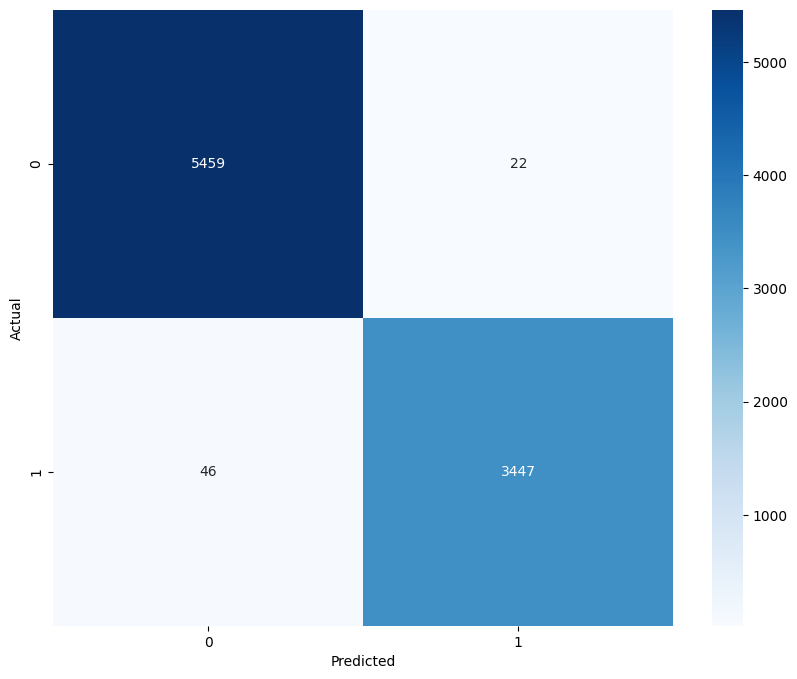

In [28]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(actual_classes, predicted_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


# GRU

In [29]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import numpy as np

# Parameters
max_words = 10000  # Number of words to consider in the dataset
max_len = 200      # Max length of sequences

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(data['text'])
sequences = tokenizer.texts_to_sequences(data['text'])
data_padded = pad_sequences(sequences, maxlen=max_len)

labels = np.asarray(data['label'])
labels = to_categorical(labels)

# Split the data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(data_padded, labels, test_size=0.2, random_state=42)


In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense

embedding_dim = 100  # This can be adjusted or use pre-trained embeddings

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=max_len))
model.add(GRU(128))
model.add(Dense(len(labels[0]), activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [31]:
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_val, y_val))

Epoch 1/10
281/281 [==============================] - 80s 277ms/step - loss: 0.1203 - accuracy: 0.9469 - val_loss: 0.0416 - val_accuracy: 0.9900
Epoch 2/10
281/281 [==============================] - 77s 275ms/step - loss: 0.0370 - accuracy: 0.9888 - val_loss: 0.0452 - val_accuracy: 0.9869
Epoch 3/10
281/281 [==============================] - 78s 276ms/step - loss: 0.0298 - accuracy: 0.9908 - val_loss: 0.0373 - val_accuracy: 0.9897
Epoch 4/10
281/281 [==============================] - 77s 275ms/step - loss: 0.0116 - accuracy: 0.9969 - val_loss: 0.0377 - val_accuracy: 0.9894
Epoch 5/10
281/281 [==============================] - 78s 276ms/step - loss: 0.0067 - accuracy: 0.9982 - val_loss: 0.0339 - val_accuracy: 0.9899
Epoch 6/10
281/281 [==============================] - 77s 275ms/step - loss: 0.0057 - accuracy: 0.9986 - val_loss: 0.0427 - val_accuracy: 0.9881
Epoch 7/10
281/281 [==============================] - 77s 274ms/step - loss: 0.0036 - accuracy: 0.9990 - val_loss: 0.0373 - val_ac

In [32]:
loss, accuracy = model.evaluate(x_val, y_val)
print(f'Validation Accuracy: {accuracy*100:.2f}%')

281/281 [==============================] - 8s 30ms/step - loss: 0.0427 - accuracy: 0.9912
Validation Accuracy: 99.12%


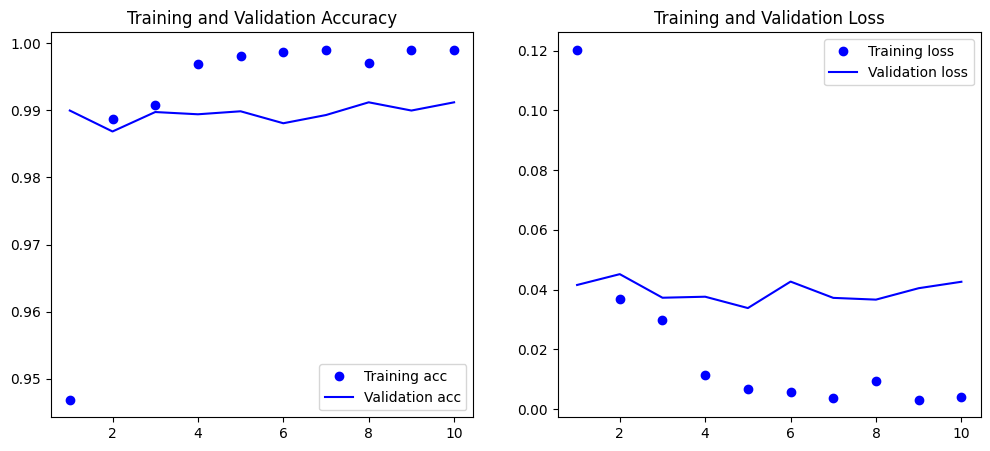

In [33]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()


281/281 [==============================] - 8s 28ms/step


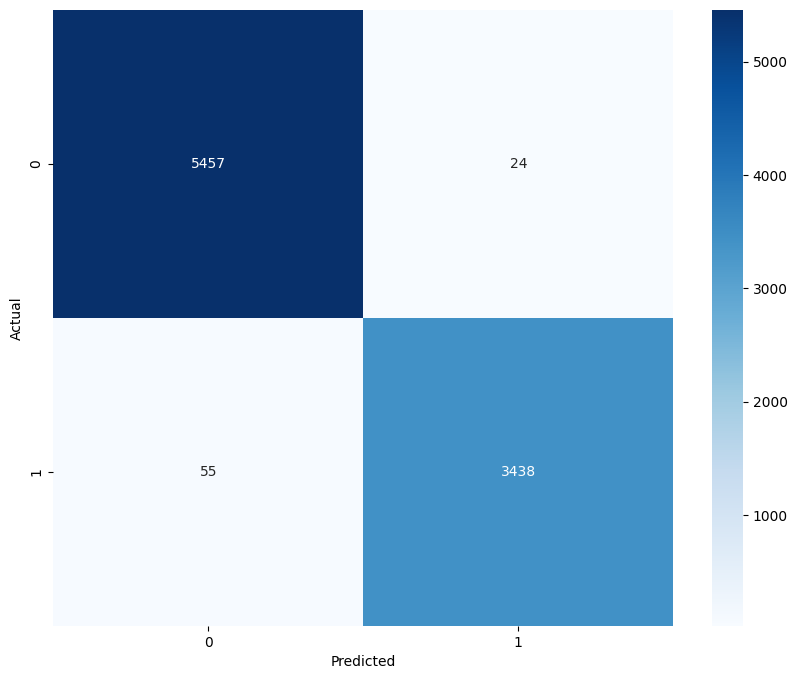

In [34]:
predictions = model.predict(x_val)
predicted_classes = np.argmax(predictions, axis=1)
actual_classes = np.argmax(y_val, axis=1)

from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(actual_classes, predicted_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# BERT

In [35]:
!pip install torch transformers


[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [36]:
# Load the provided dataset
file_path = '/kaggle/input/llm-task/train_v2_drcat_02.csv'
dataset = pd.read_csv(file_path)

In [37]:
from torch.utils.data import DataLoader, random_split
from transformers import AdamW, BertForSequenceClassification, BertTokenizer
import torch
import torch.nn as nn

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
tokenized_data = tokenizer(list(dataset['text']), padding=True, truncation=True, max_length=64, return_tensors='pt')
input_ids = tokenized_data['input_ids']
attention_mask = tokenized_data['attention_mask']
labels = torch.tensor(dataset['label'].values)

/usr/local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [38]:

class TextDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        item['labels'] = self.labels[idx]
        return item

    def __len__(self):
        return len(self.labels)

full_dataset = TextDataset(tokenized_data, labels)


train_size = int(0.8 * len(full_dataset))
val_size = len(full_dataset) - train_size
train_dataset, val_dataset = random_split(full_dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)

In [39]:
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=dataset['label'].nunique())

# Move model to GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Initialize optimizer
optimizer = AdamW(model.parameters(), lr=1e-5)

# Loss function
loss_fn = nn.CrossEntropyLoss()

# Training loop
num_epochs = 3 # Set the number of epochs
for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    for batch in train_loader:
        # Load batch to GPU
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        # Forward pass
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
    
    print(f"Epoch {epoch+1}/{num_epochs} | Training loss: {total_loss / len(train_loader)}")

    # Validation step
    model.eval()
    total_val_loss = 0
    with torch.no_grad():
        for batch in val_loader:
            # Load batch to GPU
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            # Forward pass
            outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss

            total_val_loss += loss.item()

    print(f"Epoch {epoch+1}/{num_epochs} | Validation loss: {total_val_loss / len(val_loader)}")


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/site-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1/3 | Training loss: 0.0966739774596132
Epoch 1/3 | Validation loss: 0.06925363971162389
Epoch 2/3 | Training loss: 0.02698009316091477
Epoch 2/3 | Validation loss: 0.14740771271894915
Epoch 3/3 | Training loss: 0.013456360220097947
Epoch 3/3 | Validation loss: 0.11849229036798466
